Импортируем необходимые для работы библиотеки.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Откроем предоставленные файлы и изучим общую информацию.

In [4]:
df = pd.read_excel('/Users/zvizda/test.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_id       114200 non-null  object        
 1   quantity         114200 non-null  int64         
 2   is_trial_period  114200 non-null  bool          
 3   purchase_date    114200 non-null  datetime64[ns]
 4   user_id          114200 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ MB


,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


В таблице 5 столбцов и 114200 строк. Пропусков нет.

Проведем проверку на дубликаты

In [5]:
dupl = df[df.duplicated()]
dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 4557 to 113387
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_id       84 non-null     object        
 1   quantity         84 non-null     int64         
 2   is_trial_period  84 non-null     bool          
 3   purchase_date    84 non-null     datetime64[ns]
 4   user_id          84 non-null     int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.4+ KB


Обнаружено 84 повторяющие строки. то есть клиент оплатил подписку несколько раз. нужно разбираться в причинах. Для дальнейшего анализа дубликаты убираем.

In [6]:
df_new = df.drop_duplicates()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114116 entries, 0 to 114199
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_id       114116 non-null  object        
 1   quantity         114116 non-null  int64         
 2   is_trial_period  114116 non-null  bool          
 3   purchase_date    114116 non-null  datetime64[ns]
 4   user_id          114116 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 4.5+ MB


Посмотрим какие значение есть в столбцах.

In [7]:
df_new['quantity'].unique()

array([1])

весь столбец заполнен значением 1. Данная информация не нужна для исследования. Удалим столбец

In [8]:
df_new['is_trial_period'].unique()

array([False,  True])

значения столбца совпадают с условием задачи, лишних значений нет.

In [9]:
df_new['product_id'].unique()

array(['1week_4.99_USD_subscription_7days_trial'], dtype=object)

Тоже только одно значение в колонке. Удалим и ее.

In [10]:
df_new = df_new[['is_trial_period', 'purchase_date', 'user_id']]

Посмотрим за какой промежуток предоставлены данные.

In [11]:
df_new['purchase_date'].describe()

count                  114116
unique                     51
top       2020-02-13 00:00:00
freq                     3343
first     2020-01-01 00:00:00
last      2020-02-20 00:00:00
Name: purchase_date, dtype: object

В нашем распоряжении есть данные с 01 января 2020 по 20 февраля 2020

Разделим таблицу на две, в зависимости от значения столбца "is_trial_period"

In [12]:
visits = df_new.query('is_trial_period == True')
visits = visits[['purchase_date', 'user_id']]
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62944 entries, 2601 to 114199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  62944 non-null  datetime64[ns]
 1   user_id        62944 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [13]:
orders = df_new.query('is_trial_period == False')
orders = orders[['purchase_date', 'user_id']]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51172 entries, 0 to 114162
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  51172 non-null  datetime64[ns]
 1   user_id        51172 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 MB


Разделим пользователей на когорты Пусть признаком принадлежности к определенной когорте будет неделя пробного периода. Представленные данные ровно на недели не деляться, поэтому оставим только целые недели со среды до вторника.

In [14]:
visits_new = visits[visits['purchase_date'] < '2020-02-19']
visits_new.info()
orders_new = orders[orders['purchase_date'] < '2020-02-19']
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61389 entries, 2601 to 114199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  61389 non-null  datetime64[ns]
 1   user_id        61389 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48604 entries, 1 to 114162
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  48604 non-null  datetime64[ns]
 1   user_id        48604 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 MB


Проставим дату конца недели для каждого пользоваателя.

In [15]:
def ser(i):
    t = i['purchase_date']
    if t < pd.to_datetime('2020-01-08'):
        return '2020-01-07'
    elif pd.to_datetime('2020-01-15') > t >= pd.to_datetime('2020-01-08'):
        return '2020-01-14'
    elif pd.to_datetime('2020-01-22') > t >= pd.to_datetime('2020-01-15'):
        return '2020-01-21'
    elif pd.to_datetime('2020-01-29') > t >= pd.to_datetime('2020-01-22'):
        return '2020-01-28'
    elif pd.to_datetime('2020-02-05') > t >= pd.to_datetime('2020-01-29'):
        return '2020-02-04'
    elif pd.to_datetime('2020-02-12') > t >= pd.to_datetime('2020-02-05'):
        return '2020-02-11'
    elif pd.to_datetime('2020-02-19') > t >= pd.to_datetime('2020-02-12'):
        return '2020-02-18'
    else:
        return 'W'
visits_new['week'] = visits_new.apply(ser, axis = 1)
visits_new.head(5)

,purchase_date,user_id,week
2601,2020-02-10,9429240,2020-02-11
2602,2020-01-14,6629221,2020-01-14
2603,2020-01-07,8428489,2020-01-07
2604,2020-02-05,9294519,2020-02-11
2605,2020-02-14,7611125,2020-02-18


Переведем в формат даты.

In [16]:
visits_new['week'] = pd.to_datetime(visits_new['week'],format = '%Y-%m-%d')
visits_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61389 entries, 2601 to 114199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  61389 non-null  datetime64[ns]
 1   user_id        61389 non-null  int64         
 2   week           61389 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.9 MB


Проверим у всех ли пользователей был только 1 пробный период. 

In [17]:
first_reg = visits_new.groupby('user_id')['week'].count().reset_index()
first_reg['week'].unique()

array([1, 2])

In [18]:
dupl_visit = first_reg.query('week == 2')
dupl_visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 2274 to 53832
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  34 non-null     int64
 1   week     34 non-null     int64
dtypes: int64(2)
memory usage: 816.0 bytes


34 пользователей дважды получали пробный бесплатный период. Стоит найти id этих пользователей и понять почему так получилось, для дальнейших исследований уберем информацию о них из данных.

In [19]:
visits_new1 = visits_new.query('user_id not in @dupl_visit.user_id')
visits_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61321 entries, 2601 to 114199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  61321 non-null  datetime64[ns]
 1   user_id        61321 non-null  int64         
 2   week           61321 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.9 MB


Переименуем столбцы

In [20]:
visits_new1.columns = ['first_date','user_id','week']
visits_new1.head()

,first_date,user_id,week
2601,2020-02-10,9429240,2020-02-11
2602,2020-01-14,6629221,2020-01-14
2603,2020-01-07,8428489,2020-01-07
2604,2020-02-05,9294519,2020-02-11
2605,2020-02-14,7611125,2020-02-18


Присоединим таблицу заказов

In [21]:
orders_new1 = orders_new.merge(visits_new1, on='user_id', how = 'left')
orders_new1.sample(5)

,purchase_date,user_id,first_date,week
2367,2020-02-15,9119999,2020-01-31,2020-02-04
35444,2020-02-09,8363468,2020-01-05,2020-01-07
24971,2020-02-18,7604461,2020-01-14,2020-01-14
31774,2020-01-24,8507619,2020-01-10,2020-01-14
19673,2020-01-30,8909582,2020-01-23,2020-01-28


Проверим все ли оплаты сделаны после пробного периода.

In [22]:
def der(i):
    t = i['purchase_date']
    g = i['first_date']
    if g < t:
        return 0
    else:
        return 1
orders_new1['error'] = orders_new1.apply(der, axis = 1)
orders_new1.head(5)

,purchase_date,user_id,first_date,week,error
0,2020-02-17,9422402,2020-02-10,2020-02-11,0
1,2020-02-18,4997991,2020-02-11,2020-02-11,0
2,2020-02-18,9455582,2020-02-11,2020-02-11,0
3,2020-02-16,8803657,2020-01-19,2020-01-21,0
4,2020-02-17,8800360,2020-01-19,2020-01-21,0


In [23]:
orders_new1['error'].sum()

38

38 оплат прошло ранее, чем начался пробный период. Так тоже быть не должно, это нужно отследить. 

In [24]:
orders_new2 = orders_new1.query('error == 0')
orders_new2.info()
orders_new2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48566 entries, 0 to 48603
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_date  48566 non-null  datetime64[ns]
 1   user_id        48566 non-null  int64         
 2   first_date     48566 non-null  datetime64[ns]
 3   week           48566 non-null  datetime64[ns]
 4   error          48566 non-null  int64         
dtypes: datetime64[ns](3), int64(2)
memory usage: 2.2 MB


,purchase_date,user_id,first_date,week,error
0,2020-02-17,9422402,2020-02-10,2020-02-11,0
1,2020-02-18,4997991,2020-02-11,2020-02-11,0
2,2020-02-18,9455582,2020-02-11,2020-02-11,0
3,2020-02-16,8803657,2020-01-19,2020-01-21,0
4,2020-02-17,8800360,2020-01-19,2020-01-21,0


Выделим периоды жизни когорт

In [25]:
orders_new2['lifetime'] = orders_new2['purchase_date'] - orders_new2['first_date']
orders_new2['lifetime'] = orders_new2['lifetime'] / np.timedelta64(1, 'W')
orders_new2['lifetime'] = orders_new2['lifetime'].astype('int') 
orders_new2.head(5)

,purchase_date,user_id,first_date,week,error,lifetime
0,2020-02-17,9422402,2020-02-10,2020-02-11,0,1
1,2020-02-18,4997991,2020-02-11,2020-02-11,0,1
2,2020-02-18,9455582,2020-02-11,2020-02-11,0,1
3,2020-02-16,8803657,2020-01-19,2020-01-21,0,4
4,2020-02-17,8800360,2020-01-19,2020-01-21,0,4


Проверим еще на ошибки в продолжительности пробного периода. 

In [26]:
orders_new2.query('lifetime == 0')

,purchase_date,user_id,first_date,week,error,lifetime
14301,2020-01-14,8477738,2020-01-09,2020-01-14,0,0
18123,2020-01-31,9112200,2020-01-30,2020-02-04,0,0


У 2-х пользователей не прошло 7 дней с даты подклчения пробного периода до оплаты. Еще один повод обратиться к коллегам.

In [27]:
orders_new3 = orders_new2.query('lifetime != 0')

Сформируем когорты.

In [28]:
cohorts = orders_new3.groupby(['week', 'lifetime']).agg({'user_id': 'nunique', 'purchase_date' : 'count'}).reset_index() 
cohorts

,week,lifetime,user_id,purchase_date
0,2020-01-07,1,3477,3478
1,2020-01-07,2,2801,2801
2,2020-01-07,3,2490,2490
3,2020-01-07,4,2216,2216
4,2020-01-07,5,1968,1968
5,2020-01-07,6,1591,1591
6,2020-01-14,1,3023,3025
7,2020-01-14,2,2451,2452
8,2020-01-14,3,2113,2113
9,2020-01-14,4,1854,1857


В таблице видно что оплаты некоторых пользователей проходят за 1 неделю дважды (кол-во оплат и плательщиков не совпадает), этого быть не должно. Будем ориентироваться на счетчик уникальных пользователей, тк хоть оплата и списана, пользователь может запросить возврат. 

Рассчитаем и добавим в таблицу доход когорт, согласно условию подписка стоит 4,99

In [29]:
cohorts['revenue'] = cohorts['user_id'] * 4.99
cohorts.head()

,week,lifetime,user_id,purchase_date,revenue
0,2020-01-07,1,3477,3478,17350.23
1,2020-01-07,2,2801,2801,13976.99
2,2020-01-07,3,2490,2490,12425.10
3,2020-01-07,4,2216,2216,11057.84
4,2020-01-07,5,1968,1968,9820.32


Добавим в таблицу количество пользователей в когортах

In [30]:
users = cohorts.query('lifetime == 1')[['week','user_id']]
users.columns = ['week', 'users']
users

,week,users
0,2020-01-07,3477
6,2020-01-14,3023
11,2020-01-21,3125
15,2020-01-28,2543
18,2020-02-04,2847
20,2020-02-11,2893


In [31]:
cohorts = cohorts.merge(users, on = 'week', how = 'left')
cohorts.head()

,week,lifetime,user_id,purchase_date,revenue,users
0,2020-01-07,1,3477,3478,17350.23,3477
1,2020-01-07,2,2801,2801,13976.99,3477
2,2020-01-07,3,2490,2490,12425.10,3477
3,2020-01-07,4,2216,2216,11057.84,3477
4,2020-01-07,5,1968,1968,9820.32,3477


Рассчитаем LTV по когортам и отобразим на графике

In [32]:
cohorts['ltv'] = cohorts['revenue']/cohorts['users']
cohorts.head()

,week,lifetime,user_id,purchase_date,revenue,users,ltv
0,2020-01-07,1,3477,3478,17350.23,3477,4.990000
1,2020-01-07,2,2801,2801,13976.99,3477,4.019842
2,2020-01-07,3,2490,2490,12425.10,3477,3.573512
3,2020-01-07,4,2216,2216,11057.84,3477,3.180282
4,2020-01-07,5,1968,1968,9820.32,3477,2.824366


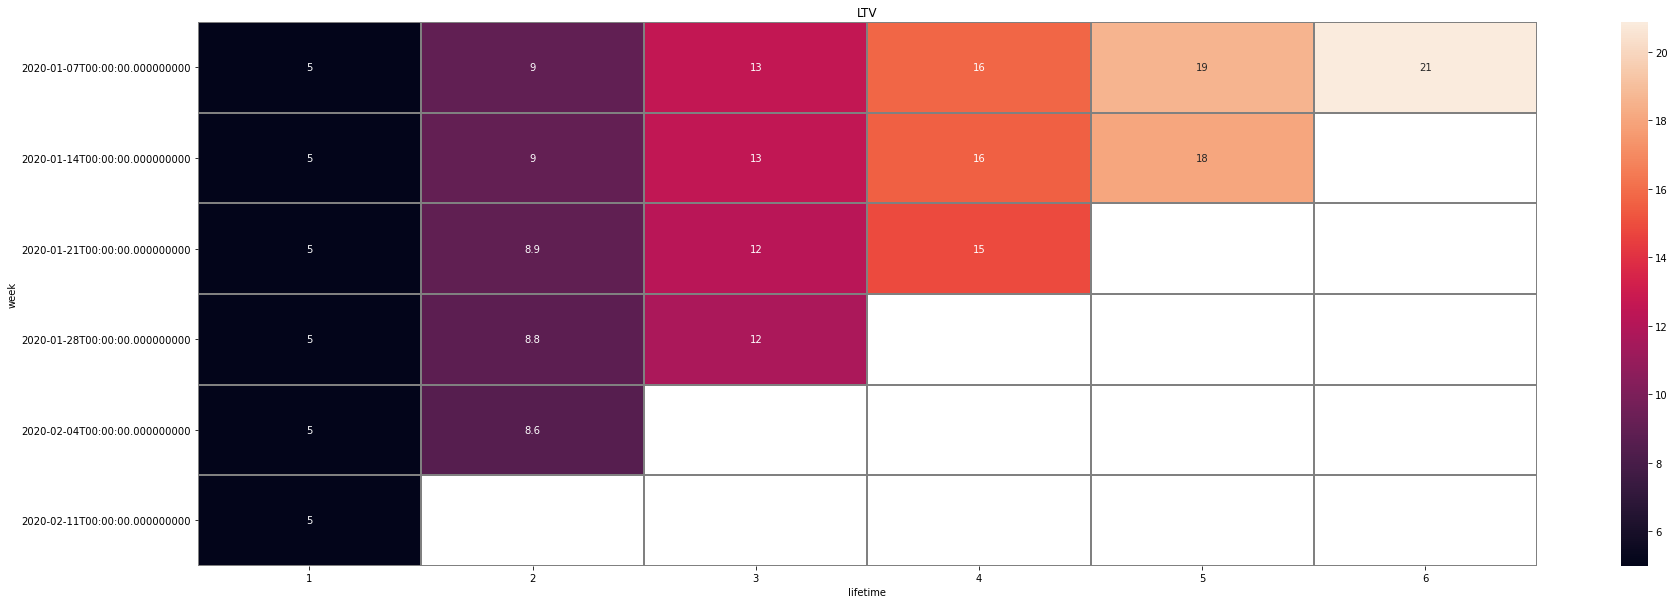

In [33]:
ltv = cohorts.pivot_table(index='week', columns='lifetime', values='ltv', aggfunc='mean').cumsum(axis=1)
plt.figure(figsize=(30, 10))
plt.title('LTV')
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='gray')
plt.show()

По графику видно, например текущий LTV когорты 07-01 равен 21, а когорты 04-02 8,6. Так же заметно что у разных когорт показатель растет по-разному.

Спрогнозируем, каким будет LTV на полгода и построим графики

Для начала построим график ltv по имеющимся данным.

In [34]:
cohorts['ltv_cum']= cohorts.groupby('week')['ltv'].cumsum()
cohorts.tail()

,week,lifetime,user_id,purchase_date,revenue,users,ltv,ltv_cum
16,2020-01-28,2,1934,1934,9650.66,2543,3.794990,8.784990
17,2020-01-28,3,1511,1511,7539.89,2543,2.964959,11.749949
18,2020-02-04,1,2847,2850,14206.53,2847,4.990000,4.990000
19,2020-02-04,2,2033,2035,10144.67,2847,3.563284,8.553284
20,2020-02-11,1,2893,2893,14436.07,2893,4.990000,4.990000


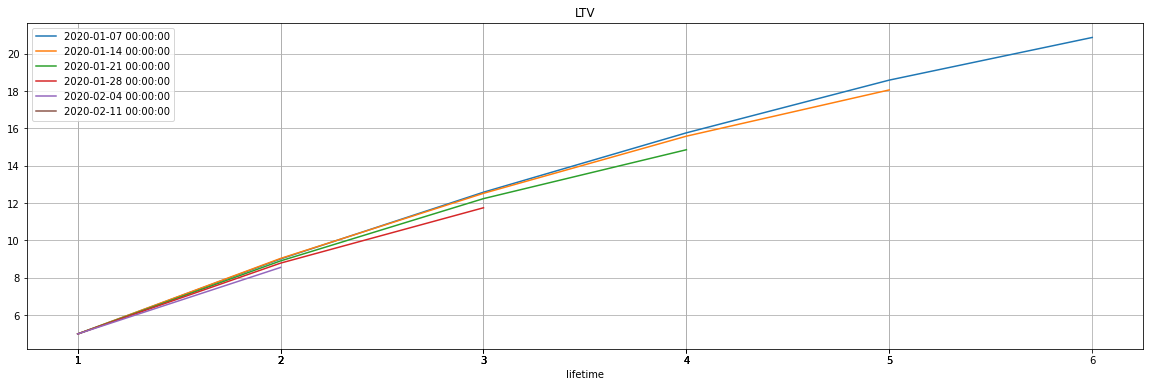

In [35]:
cohorts.set_index('lifetime', inplace=True)
cohorts.groupby('week')['ltv_cum'].plot(legend=True, grid = True, figsize = (20,6),title = 'LTV')
plt.xticks(cohorts.index.tolist())
plt.legend()
plt.show()

По графику видно, что темп роста LTV падает. к определенному временному периоду он выйдет на плато. К сожалению у нас данные за короткий промежуток времени, поэтому будем исходить из них. Предположим, что темп роста после 6-ой недели останется постоянным на уровне 5-6 недели когорты 07-01. А до 6-ой недели у других когорт будет как у самой "старой".

создадим таблицу с коэффициентами. 

In [36]:
cohorts = cohorts.reset_index()
cohorts_0107 = cohorts.query('week == "2020-01-07"')
cohorts_0107

,lifetime,week,user_id,purchase_date,revenue,users,ltv,ltv_cum
0,1,2020-01-07,3477,3478,17350.23,3477,4.990000,4.990000
1,2,2020-01-07,2801,2801,13976.99,3477,4.019842,9.009842
2,3,2020-01-07,2490,2490,12425.10,3477,3.573512,12.583353
3,4,2020-01-07,2216,2216,11057.84,3477,3.180282,15.763635
4,5,2020-01-07,1968,1968,9820.32,3477,2.824366,18.588001
5,6,2020-01-07,1591,1591,7939.09,3477,2.283316,20.871317


In [37]:
cohorts_0 = cohorts_0107.copy(deep=True)
for i in (1,2,3,4,5):
    cohorts_0.loc[i,'coef'] = cohorts_0.loc[i,'ltv_cum'] - cohorts_0.loc[i-1,'ltv_cum']
coef = cohorts_0[['lifetime', 'coef']]
coef

,lifetime,coef
0,1,NaN
1,2,4.019842
2,3,3.573512
3,4,3.180282
4,5,2.824366
5,6,2.283316


In [38]:
for i in list(range(6, 27)):
    coef.loc[i,'lifetime'] = (i+1)
    coef.loc[i,'coef'] = 2.283316
coef.tail(3)    

,lifetime,coef
24,25.0,2.283316
25,26.0,2.283316
26,27.0,2.283316


Сформируем данные для каждой когорты и присоеденим к ним коэффициенты.

In [39]:
cohorts_0114 = cohorts.query('week == "2020-01-14"')
cohorts_0121 = cohorts.query('week == "2020-01-21"')
cohorts_0128 = cohorts.query('week == "2020-01-28"')
cohorts_0204 = cohorts.query('week == "2020-02-04"')
cohorts_0211 = cohorts.query('week == "2020-02-11"')

In [41]:
cohorts_0107 = cohorts_0107.merge(coef, on = 'lifetime', how = 'right')
cohorts_0107 = cohorts_0107.fillna(0)
for i in range(len(cohorts_0107)):
    if cohorts_0107.loc[i,'ltv'] == 0:
        cohorts_0107.loc[i,'ltv_cum'] =  cohorts_0107.loc[i-1,'ltv_cum'] + cohorts_0107.loc[i,'coef']
    else:
        cohorts_0107.loc[i,'ltv_cum'] = cohorts_0107.loc[i,'ltv_cum']

In [42]:
cohorts_0114 = cohorts_0114.merge(coef, on = 'lifetime', how = 'right')
cohorts_0114 = cohorts_0114.fillna(0)
for i in range(len(cohorts_0114)):
    if cohorts_0114.loc[i,'ltv'] == 0:
        cohorts_0114.loc[i,'ltv_cum'] =  cohorts_0114.loc[i-1,'ltv_cum'] + cohorts_0114.loc[i,'coef']
    else:
        cohorts_0114.loc[i,'ltv_cum'] = cohorts_0114.loc[i,'ltv_cum']        

In [43]:
cohorts_0121 = cohorts_0121.merge(coef, on = 'lifetime', how = 'right')
cohorts_0121 = cohorts_0121.fillna(0)
for i in range(len(cohorts_0121)):
    if cohorts_0121.loc[i,'ltv'] == 0:
        cohorts_0121.loc[i,'ltv_cum'] =  cohorts_0121.loc[i-1,'ltv_cum'] + cohorts_0121.loc[i,'coef']
    else:
        cohorts_0121.loc[i,'ltv_cum'] = cohorts_0121.loc[i,'ltv_cum'] 

In [44]:
cohorts_0128 = cohorts_0128.merge(coef, on = 'lifetime', how = 'right')
cohorts_0128 = cohorts_0128.fillna(0)
for i in range(len(cohorts_0128)):
    if cohorts_0128.loc[i,'ltv'] == 0:
        cohorts_0128.loc[i,'ltv_cum'] =  cohorts_0128.loc[i-1,'ltv_cum'] + cohorts_0128.loc[i,'coef']
    else:
        cohorts_0128.loc[i,'ltv_cum'] = cohorts_0128.loc[i,'ltv_cum']

In [45]:
cohorts_0204 = cohorts_0204.merge(coef, on = 'lifetime', how = 'right')
cohorts_0204 = cohorts_0204.fillna(0)
for i in range(len(cohorts_0204)):
    if cohorts_0204.loc[i,'ltv'] == 0:
        cohorts_0204.loc[i,'ltv_cum'] =  cohorts_0204.loc[i-1,'ltv_cum'] + cohorts_0204.loc[i,'coef']
    else:
        cohorts_0204.loc[i,'ltv_cum'] = cohorts_0204.loc[i,'ltv_cum']

In [46]:
cohorts_0211 = cohorts_0211.merge(coef, on = 'lifetime', how = 'right')
cohorts_0211 = cohorts_0211.fillna(0)
for i in range(len(cohorts_0211)):
    if cohorts_0211.loc[i,'ltv'] == 0:
        cohorts_0211.loc[i,'ltv_cum'] =  cohorts_0211.loc[i-1,'ltv_cum'] + cohorts_0211.loc[i,'coef']
    else:
        cohorts_0211.loc[i,'ltv_cum'] = cohorts_0211.loc[i,'ltv_cum']

Построим график

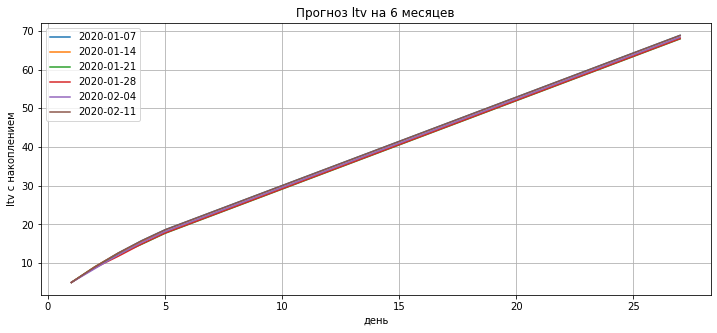

In [47]:
plt.figure(figsize = (12,5))
plt.plot(cohorts_0107['lifetime'], cohorts_0107['ltv_cum'], label='2020-01-07')
plt.plot(cohorts_0114['lifetime'], cohorts_0114['ltv_cum'], label='2020-01-14')
plt.plot(cohorts_0121['lifetime'], cohorts_0121['ltv_cum'], label='2020-01-21')
plt.plot(cohorts_0128['lifetime'], cohorts_0128['ltv_cum'], label='2020-01-28')
plt.plot(cohorts_0204['lifetime'], cohorts_0204['ltv_cum'], label='2020-02-04')
plt.plot(cohorts_0211['lifetime'], cohorts_0211['ltv_cum'], label='2020-02-11')
plt.xlabel('день')
plt.ylabel('ltv с накоплением')
plt.legend()
plt.grid()
plt.title('Прогноз ltv на 6 месяцев')
plt.show()

Ожидать значений LTV согласно графику не стоит.( Как только появятся новые данные необходимо вносить корректировки. Когда на графике реального LTV можно будет увидеть плато(график станет почти параллелен оси х), уже будет можно говорить о качественом прогнозе использую подобный подход.  

### 4
Рассчитать ROMI на 4 недели и на полгода, если стоимость привлечения платящего пользователя 6 USD (ROMI нужно брать операционный, а не бухгалтерский, цель: узнать как окупятся наши инвестиции.

In [48]:
cohorts.head()

,lifetime,week,user_id,purchase_date,revenue,users,ltv,ltv_cum
0,1,2020-01-07,3477,3478,17350.23,3477,4.990000,4.990000
1,2,2020-01-07,2801,2801,13976.99,3477,4.019842,9.009842
2,3,2020-01-07,2490,2490,12425.10,3477,3.573512,12.583353
3,4,2020-01-07,2216,2216,11057.84,3477,3.180282,15.763635
4,5,2020-01-07,1968,1968,9820.32,3477,2.824366,18.588001


In [49]:
cohorts['cum_revenue']= cohorts.groupby('week')['revenue'].cumsum()
cohorts['marketing_cost'] = 6 * cohorts['users']
cohorts['romi'] = (cohorts['cum_revenue'] - cohorts['marketing_cost']) / cohorts['marketing_cost']
cohorts.query('lifetime == 4')

,lifetime,week,user_id,purchase_date,revenue,users,ltv,ltv_cum,cum_revenue,marketing_cost,romi
3,4,2020-01-07,2216,2216,11057.84,3477,3.180282,15.763635,54810.16,20862,1.627273
9,4,2020-01-14,1854,1857,9251.46,3023,3.060357,15.584052,47110.59,18138,1.597342
14,4,2020-01-21,1640,1640,8183.60,3125,2.618752,14.858224,46431.95,18750,1.476371


Данные за 4 недели есть только по 3-м когортам. ROMI для них равно соответсвенно 1,63 1,6 и 1,48. Что бы посмотреть тенденцию и других когорт построим график.

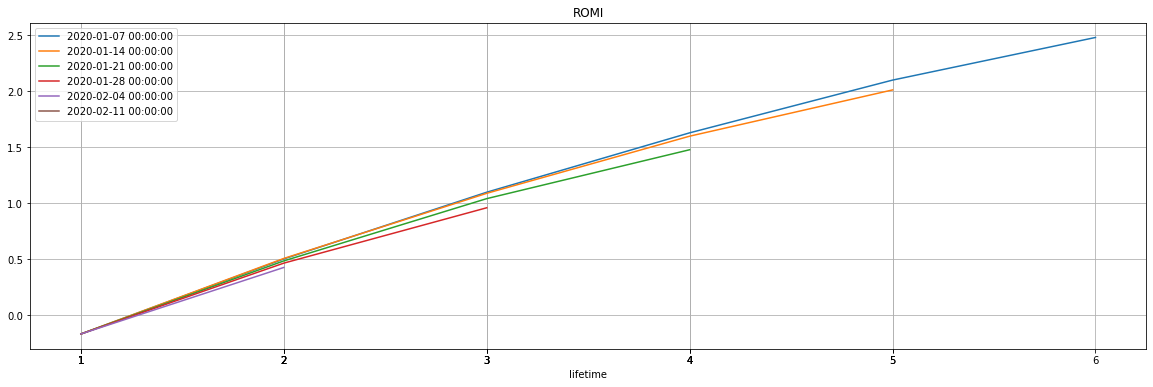

In [50]:
cohorts.set_index('lifetime', inplace=True)
cohorts.groupby('week')['romi'].plot(legend=True, grid = True, figsize = (20,6),title = 'ROMI')
plt.xticks(cohorts.index.tolist())
plt.legend()
plt.show()

По графику видно что на окупаемость когорты выходят на 2-ой неделе. Более "старая" когорта демонстрирует самые высокие показатели. Строить график прогноза на полгода нет смысла, слишком мало исходных данных. и в целом он будет похож на график LTV.

Рассчитаем Romi на полгода вперед для когорты "2020-01-07"

In [51]:
cohorts = cohorts.reset_index()
cohorts_1 = cohorts.query('week == "2020-01-07"')
coef2 = cohorts_1.loc[5,'romi'] - cohorts_1.loc[4,'romi']
coef2
print('Разница между 5 и 6 неделями для когорты "2020-01-07" составляет: {:.2f}'.format(coef2))

Разница между 5 и 6 неделями для когорты "2020-01-07" составляет: 0.38


Допустим что эта тенденция роста сохранится и дальше

In [52]:
ROMI_27 = cohorts_1.loc[5,'romi'] + coef2*26   
print('Предсказанный ROMI для когорты "2020-01-07" составит: {:.2f}'.format(ROMI_27))

Предсказанный ROMI для когорты "2020-01-07" составит: 12.37
